# Linear Disrciminant Analysis

## Purpose

Develop a model that classifies marital status based on features in the biochemist dataset

## Data Prep

In [1]:
import pandas as pd 
from pydataset import data 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df=data('bioChemists')
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


### Dummy Variables

There are two variables that contain text so we need to convert these two dummy variables for our analysis the code is below with the output.

In [3]:
dummy=pd.get_dummies(df['fem'])
df=pd.concat([df,dummy],axis=1)
dummy=pd.get_dummies(df['mar'])
df=pd.concat([df,dummy],axis=1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


Here is what we did.

We created the dummy variable by using the .get_dummies() function.
We saved the output in an object called dummy
We then combine the dummy and df dataset with the .concat() function
We repeat this process for the second variable

### Independent and Dependent Variables

The output shows that we have our original variables and the dummy variables. However, we do not need all of this information. Therefore, we will create a dataset that has the X variables we will use and a separate dataset that will have our y values. Below is the code.

In [5]:
X=df[['Men','kid5','phd','ment','art']] 
y=df['Married']

### Train and Test Sets

The X dataset has our five independent variables and the y dataset has our dependent variable which is married or not. We can not split our data into a train and test set.  The code is below.

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

The data was split 70% for training and 30% for testing. We made a train and test set for the independent and dependent variables which meant we made 4 sets altogether. We can now proceed to model development and testing

## Model Training & Testing

Below is the code to run our LDA model. We will use the .fit() function for this.

In [7]:
clf=LDA() 
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.728125

We will now use this model to predict using the .predict function

In [8]:
y_pred=clf.predict(X_test)

In [9]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

### Evaluation

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



### Visualization

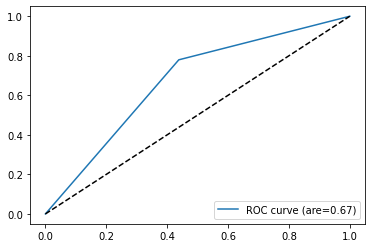

In [11]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [15]:
roc_auc

0.6706838226410535